# Block 42: Workshop
## Face Mask Detection
### Scenario

After the global pandemic, places like movie theaters across the US are starting to open again. A big part of returning to normal is ensuring people are safe and following guidelines such as wearing face masks. MMC Sercado, a big-shot cinema owner in the US, wants to ensure that masks are worn correctly to maintain safety for all patrons.

### Problem Statement
You   need to develop a deep learning model using transfer learning to spot and sort the following three situations among the movie crowd:
1. Properly adhering to face mask guidelines.
2. Incorrectly wearing the face mask.
3. Choosing not to wear a mask at all.

#### Task:  Build a Transfer Learning model to detect face masks on humans.


#### Dataset Description

The zip folder contains 2 folders train and test each folder with 3 subfolders labelled as to which class they belong to.

The 3 classes are
- "with_mask"
- "without_mask"
- "mask_worn_incorrect"

Each image is of shape 128,128,3.


Import the necessary libraries

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import gc
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
#from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import os
from PIL import Image
import tensorflow as tf
import random

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0, ResNet50


### **Task A**
1. Load the Image Training and Test Datasets from the train and test folder respectively. Each image is of shape 128 x 128 x 3.

In [8]:
train_data_generator = tf.keras.preprocessing.image.ImageDataGenerator() 
test_data_generator = tf.keras.preprocessing.image.ImageDataGenerator()

2. Load the training dataset using Keras ImageDataGenerator.

In [9]:
train_data = train_data_generator.flow_from_directory(directory = "C:\\Users\\arado\\Desktop\\Items from FULLSTACK\\42\\face_mask_detection_dataset\\train", target_size = (128, 128), batch_size = 1, shuffle = True)

Found 2904 images belonging to 3 classes.


3. Load the test dataset using Keras ImageDataGenerator.

In [10]:
test_data = test_data_generator.flow_from_directory(directory = "C:\\Users\\arado\\Desktop\\Items from FULLSTACK\\42\\face_mask_detection_dataset\\test", target_size = (128, 128), batch_size = 1, shuffle = True)

Found 308 images belonging to 3 classes.


There are three labels found: `mask_weared_incorrect`, `with_mask`, and `without_mask`.

ImageDataGenerator does not really assign values to an array, it just hold pointers. Because of that every learning step CPU perform reading operations. This very slows learning speed. 

4. Store the data in a numpy array type.

In [11]:
train_data
test_data

In [12]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define directories for train and test datasets
train_dir = 'C:\\Users\\arado\\Desktop\\Items from FULLSTACK\\42\\face_mask_detection_dataset\\train'  # e.g., 'dataset/train'
test_dir = 'C:\\Users\\arado\\Desktop\\Items from FULLSTACK\\42\\face_mask_detection_dataset\\test'    # e.g., 'dataset/test'

categories = ['mask_worn_incorrect', 'with_mask', 'without_mask']

# Define image dimensions
IMG_SIZE = (128, 128)

# Function to load images from a given directory and return numpy arrays
def load_data_from_directory(directory):
    data = []
    labels = []
    
    # Iterate through each category (subdirectory)
    for category in categories:
        category_path = os.path.join(directory, category)
        label = categories.index(category)  # Assign a label based on category index
        
        for image_name in os.listdir(category_path):
            try:
                # Load the image
                img_path = os.path.join(category_path, image_name)
                img = load_img(img_path, target_size=IMG_SIZE)  # Resize image
                img_array = img_to_array(img) / 255.0  # Convert to array and normalize
                
                # Append to data and labels
                data.append(img_array)
                labels.append(label)
            
            except Exception as e:
                print(f"Error loading image {image_name}: {e}")
    
    # Convert to numpy arrays
    data = np.array(data, dtype="float32")
    labels = np.array(labels)
    
    return data, labels

# Load training data
X_train, y_train = load_data_from_directory(train_dir)
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")

# Load testing data
X_test, y_test = load_data_from_directory(test_dir)
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

Training data shape: (2904, 128, 128, 3), Training labels shape: (2904,)
Test data shape: (308, 128, 128, 3), Test labels shape: (308,)


5. Build a Transfer Learning network using Keras with the following layers:

- EfficientNetB0 as first layers using Keras API.
- GLobalAveragePooling2D layer
- Dropout(0.2)
- Dense layer with 3 neurons and activation softmax


In [13]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
# Freeze the base model
base_model.trainable = False


transfer_model_ENB0 = keras.Sequential([base_model, 
                                        keras.layers.GlobalAveragePooling2D(),
                                        keras.layers.Dropout(0.2),
                                        keras.layers.Dense(3, activation='softmax')
])


AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'


6. Compile the model with adam optimizer, categorical_crossentropy loss, and with metrics accuracy.

In [14]:
# Compile the model
transfer_model_ENB0.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
transfer_model_ENB0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 4, 4, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │         3,843 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,053,414 (15.46 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

7. Train the model for 4 epochs with callbacks. Reduce learning rate on Plateau and early stopping while monitoring validation loss.

In [15]:
# Define callbacks
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import backend as K

# Clear previous session to avoid residual state
K.clear_session()

# Compile the model
transfer_model_ENB0.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
transfer_model_ENB0.summary()

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

# Check data shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


callbacks = [
    # Reduce learning rate when a metric has stopped improving
    ReduceLROnPlateau(
        monitor='val_loss',  # Monitor validation loss
        factor=0.1,          # Reduce learning rate by a factor of 0.1
        patience=3,          # Wait for 3 epochs with no improvement
        min_lr=1e-6,         # Minimum learning rate allowed
        verbose=1            # Print information when learning rate is reduced
    ),
    
    # Stop training early when no improvement is seen
    EarlyStopping(
        monitor='val_loss',  # Monitor validation loss
        patience=5,          # Stop training after 5 epochs with no improvement
        verbose=1,           # Print information when training is stopped early
        restore_best_weights=True  # Restore the model weights from the best epoch
    )
]

# Train the model
history_enb0 = transfer_model_ENB0.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=40,  # Train for 4 epochs
    batch_size=32,  # You can adjust this based on your resources
    callbacks=callbacks  # Use the defined callbacks
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 4, 4, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │         3,843 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,053,414 (15.46 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

X_train shape: (2904, 128, 128, 3), y_train shape: (2904, 3)
X_test shape: (308, 128, 128, 3), y_test shape: (308, 3)
Epoch 1/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 23s 171ms/step - accuracy: 0.3933 - loss: 1.1017 - val_accuracy: 0.2857 - val_loss: 1.1191 - learning_rate: 0.0010
Epoch 2/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 13s 148ms/step - accuracy: 0.4114 - loss: 1.0850 - val_accuracy: 0.2857 - val_loss: 1.1489 - learning_rate: 0.0010
Epoch 3/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 13s 146ms/step - accuracy: 0.4127 - loss: 1.0979 - val_accuracy: 0.2857 - val_loss: 1.1381 - learning_rate: 0.0010
Epoch 4/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.4173 - loss: 1.0926
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
91/91 ━━━━━━━━━━━━━━━━━━━━ 14s 151ms/step - accuracy: 0.4174 - loss: 1.0925 - val_accuracy: 0.2857 - val_loss: 1.1452 - learning_rate: 0.0010
Epoch 5/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 14s 150ms/step - accuracy: 0.4321 - loss: 1.0787 - val_accuracy: 0.2857 - val_lo

8. Plot training and validation accuracy and loss against epochs.

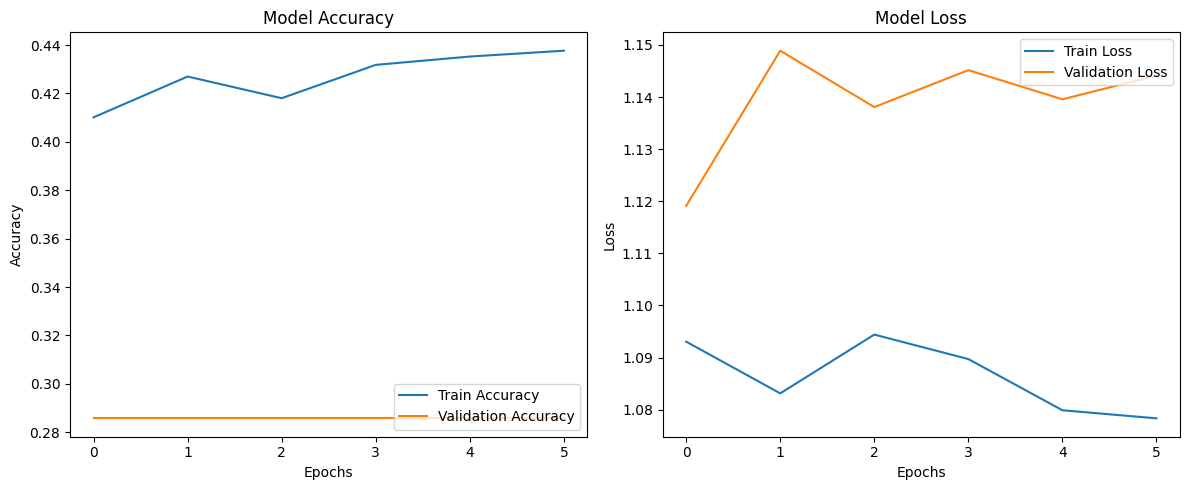

In [16]:
import matplotlib.pyplot as plt

# Assuming 'history' is the result from model.fit
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_enb0.history['accuracy'], label='Train Accuracy')
plt.plot(history_enb0.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_enb0.history['loss'], label='Train Loss')
plt.plot(history_enb0.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## **Task B**

1. Load the Image Training and Test Datasets from the train and test folder respectively. Each image is of shape 128 x 128 x 3.
2. Load training dataset using Keras ImageDataGenerator with validation_split=0.2. 
3. Load test dataset using Keras ImageDataGenerator.
4. Build a Transfer Learning network using Keras with the following layers:

- ResNet50 as first layers using Keras API.
- GLobalAveragePooling2D layer
- Dropout(0.5)
- Dense layer with 3 neurons and activation softmax

In [17]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
# Freeze the base model
base_model.trainable = False


transfer_model_ResNet50 = keras.Sequential([base_model, 
                                        keras.layers.GlobalAveragePooling2D(),
                                        keras.layers.Dropout(0.5),
                                        keras.layers.Dense(3, activation='softmax')
])

5. Compile the model with adam optimizer, categorical_crossentropy loss, and with metrics accuracy.

In [18]:
transfer_model_ResNet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
transfer_model_ResNet50.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 4, 4, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │         6,147 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,593,859 (90.00 MB)

 Trainable params: 6,147 (24.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

6. Train the model for 4 epochs with callbacks. Reduce learning rate on Plateau and early stopping while monitoring validation loss.

In [19]:

# Check data shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


callbacks = [
    # Reduce learning rate when a metric has stopped improving
    ReduceLROnPlateau(
        monitor='val_loss',  # Monitor validation loss
        factor=0.1,          # Reduce learning rate by a factor of 0.1
        patience=3,          # Wait for 3 epochs with no improvement
        min_lr=1e-6,         # Minimum learning rate allowed
        verbose=1            # Print information when learning rate is reduced
    ),
    
    # Stop training early when no improvement is seen
    EarlyStopping(
        monitor='val_loss',  # Monitor validation loss
        patience=5,          # Stop training after 5 epochs with no improvement
        verbose=1,           # Print information when training is stopped early
        restore_best_weights=True  # Restore the model weights from the best epoch
    )
]

# Train the model
history_res50 = transfer_model_ResNet50.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=40,  # Train for 4 epochs
    batch_size=32,  # You can adjust this based on your resources
    callbacks=callbacks  # Use the defined callbacks
)

X_train shape: (2904, 128, 128, 3), y_train shape: (2904, 3)
X_test shape: (308, 128, 128, 3), y_test shape: (308, 3)
Epoch 1/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 34s 320ms/step - accuracy: 0.3862 - loss: 1.1119 - val_accuracy: 0.2857 - val_loss: 1.1115 - learning_rate: 0.0010
Epoch 2/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 316ms/step - accuracy: 0.4491 - loss: 1.0514 - val_accuracy: 0.2857 - val_loss: 1.0985 - learning_rate: 0.0010
Epoch 3/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 27s 300ms/step - accuracy: 0.4552 - loss: 1.0350 - val_accuracy: 0.2890 - val_loss: 1.0877 - learning_rate: 0.0010
Epoch 4/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 321ms/step - accuracy: 0.4516 - loss: 1.0252 - val_accuracy: 0.2890 - val_loss: 1.0738 - learning_rate: 0.0010
Epoch 5/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 314ms/step - accuracy: 0.4723 - loss: 1.0086 - val_accuracy: 0.3929 - val_loss: 1.0306 - learning_rate: 0.0010
Epoch 6/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 28s 311ms/step - accuracy: 0.4993 - loss: 0.9906 - val_accuracy: 0.3247 - val_l

7. Plot training and validation accuracy and loss against epochs.

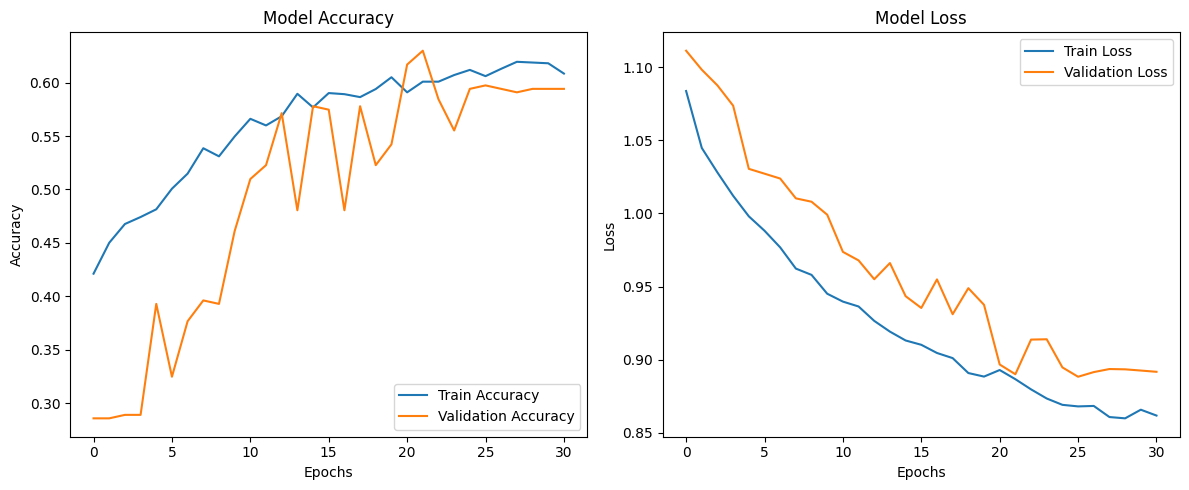

In [20]:
# Assuming 'history' is the result from model.fit
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_res50.history['accuracy'], label='Train Accuracy')
plt.plot(history_res50.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_res50.history['loss'], label='Train Loss')
plt.plot(history_res50.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## **Task C**

1. Compare EfficientNetB0 and ResNet50 model performance and find the best model.

2. Choose the best model to check recall, precision, and f1-score values.

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 272ms/step
                     precision    recall  f1-score   support

mask_worn_incorrect       0.82      0.81      0.81       110
          with_mask       0.78      0.13      0.22       110
       without_mask       0.45      0.92      0.60        88

           accuracy                           0.60       308
          macro avg       0.68      0.62      0.54       308
       weighted avg       0.70      0.60      0.54       308

Confusion Matrix:


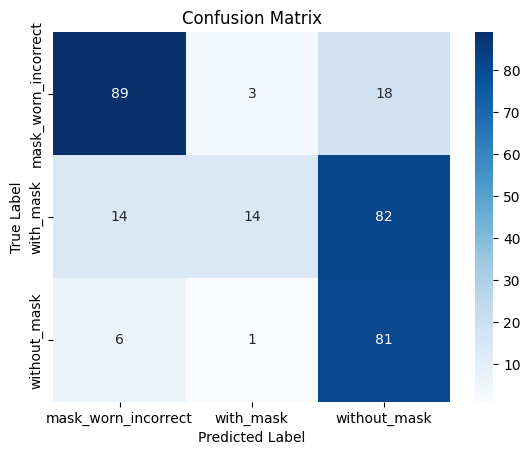

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns


# y_test is in one-hot encoded format; convert it to class labels
y_true = np.argmax(y_test, axis=1)

# Predict on the test set
y_pred_prob = transfer_model_ResNet50.predict(X_test)  # Get probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Get class labels

# Print classification report
print(classification_report(y_true, y_pred, target_names=['mask_worn_incorrect', 'with_mask', 'without_mask']))

# Optional: Print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['mask_worn_incorrect', 'with_mask', 'without_mask'],
            yticklabels=['mask_worn_incorrect', 'with_mask', 'without_mask'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()